In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import re

In [7]:
# scale info loader
# sources = []
# mypath = "result\\scale"
# for path, subdirs, files in os.walk(mypath):
#     for name in files:
#         if "result" in name:
#             continue

#         data = pd.read_csv(os.path.join(path, name), delimiter="\t")
#         data['scale']=os.path.split(path)[1]
#         data['inst']=os.path.split(os.path.split(path)[0])[1]
#         sources.append(data)

# raw_scale_benchmark_df = pd.concat(sources, ignore_index=True)

# workload info loader
# sources = []
# mypath = "result\\workload"
# for path, subdirs, files in os.walk(mypath):
#     for name in files:
#         if "result" in name:
#             continue

#         data = pd.read_csv(os.path.join(path, name), delimiter="\t")
#         data['workload']=os.path.split(path)[1]
#         data['inst']=os.path.split(os.path.split(path)[0])[1]
#         sources.append(data)
# raw_workload_benchmark_df = pd.concat(sources, ignore_index=True)

# concurrency info loader
# sources = []
# mypath = "result\\concurrency"
# for path, subdirs, files in os.walk(mypath):
#     for name in files:
#         if "result" in name:
#             continue

#         data = pd.read_csv(os.path.join(path, name), delimiter="\t")
#         data['concurrency']=os.path.split(path)[1]
#         data['inst']=os.path.split(os.path.split(path)[0])[1]
#         sources.append(data)
# raw_concurrency_benchmark_df = pd.concat(sources, ignore_index=True)

In [8]:
# scale info loader
sources = []
mypath = "result\\scale"
for path, subdirs, files in os.walk(mypath):
    for name in files:
        if "result" not in name:
            continue

        result_data = dict()
        result_data['scale']=os.path.split(path)[1]
        result_data['inst']=os.path.split(os.path.split(path)[0])[1]

        with open(os.path.join(path, name), 'r') as file:
            for row in file.readlines()[6:24]:
                if ":" not in row:
                    continue

                header, data = row.split(":")
                if header not in result_data.keys(): 
                    result_data[header.strip()] = data.strip()

        sources.append(result_data)

scale_benchmark_df = pd.DataFrame(sources)

# workload info loader
# sources = []
# mypath = "result\\workload"
# for path, subdirs, files in os.walk(mypath):
#     for name in files:
#         if "result" not in name:
#             continue

#         result_data = dict()
#         result_data['workload']=os.path.split(path)[1]
#         result_data['inst']=os.path.split(os.path.split(path)[0])[1]

#         with open(os.path.join(path, name), 'r') as file:
#             for row in file.readlines()[6:24]:
#                 if ":" not in row:
#                     continue

#                 header, data = row.split(":")
#                 if header not in result_data.keys(): 
#                     result_data[header.strip()] = data.strip()

#         sources.append(result_data)

# workload_benchmark_df = pd.DataFrame(sources)

# concurrency info loader
sources = []
mypath = "result\\concurrency"
for path, subdirs, files in os.walk(mypath):
    for name in files:
        if "result" not in name:
            continue

        result_data = dict()
        result_data['concurrency']=os.path.split(path)[1]
        result_data['inst']=os.path.split(os.path.split(path)[0])[1]

        with open(os.path.join(path, name), 'r') as file:
            for row in file.readlines()[6:24]:
                if ":" not in row:
                    continue

                if len(row.split(":")) > 2:
                    continue

                header, data = row.split(":")
                if header not in result_data.keys(): 
                    result_data[header.strip()] = data.strip()

        sources.append(result_data)

concurrency_benchmark_df = pd.DataFrame(sources)

In [9]:
# workload_benchmark_df
# scale_benchmark_df
# concurrency_benchmark_df

In [14]:
# workload_benchmark_clear = workload_benchmark_df.copy()
# workload_benchmark_clear['Requests per second'] = workload_benchmark_clear['Requests per second'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
# workload_benchmark_clear['Time per request'] = workload_benchmark_clear['Time per request'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
# workload_benchmark_clear['Time taken for tests'] = workload_benchmark_clear['Time taken for tests'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
# workload_benchmark_clear['workload'] = workload_benchmark_clear['workload'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(int)

scale_benchmark_clear = scale_benchmark_df.copy()
scale_benchmark_clear['Requests per second'] = scale_benchmark_clear['Requests per second'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
scale_benchmark_clear['Time per request'] = scale_benchmark_clear['Time per request'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
scale_benchmark_clear['Time taken for tests'] = scale_benchmark_clear['Time taken for tests'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
scale_benchmark_clear['Failed requests'] = scale_benchmark_clear['Failed requests'].fillna(0).astype(int)
scale_benchmark_clear['scale'] = scale_benchmark_clear['scale'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(int)

concurrency_benchmark_clear = concurrency_benchmark_df.copy()
concurrency_benchmark_clear['Requests per second'] = concurrency_benchmark_clear['Requests per second'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
concurrency_benchmark_clear['Time per request'] = concurrency_benchmark_clear['Time per request'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
concurrency_benchmark_clear['Time taken for tests'] = concurrency_benchmark_clear['Time taken for tests'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(float)
concurrency_benchmark_clear['Failed requests'] = concurrency_benchmark_clear['Failed requests'].fillna(0).astype(int)
concurrency_benchmark_clear['concurrency'] = concurrency_benchmark_clear['concurrency'].str.replace(r'[a-zA-Z#\[\]\/() ]', '', regex=True).astype(int)


# Grafico estresse de carga

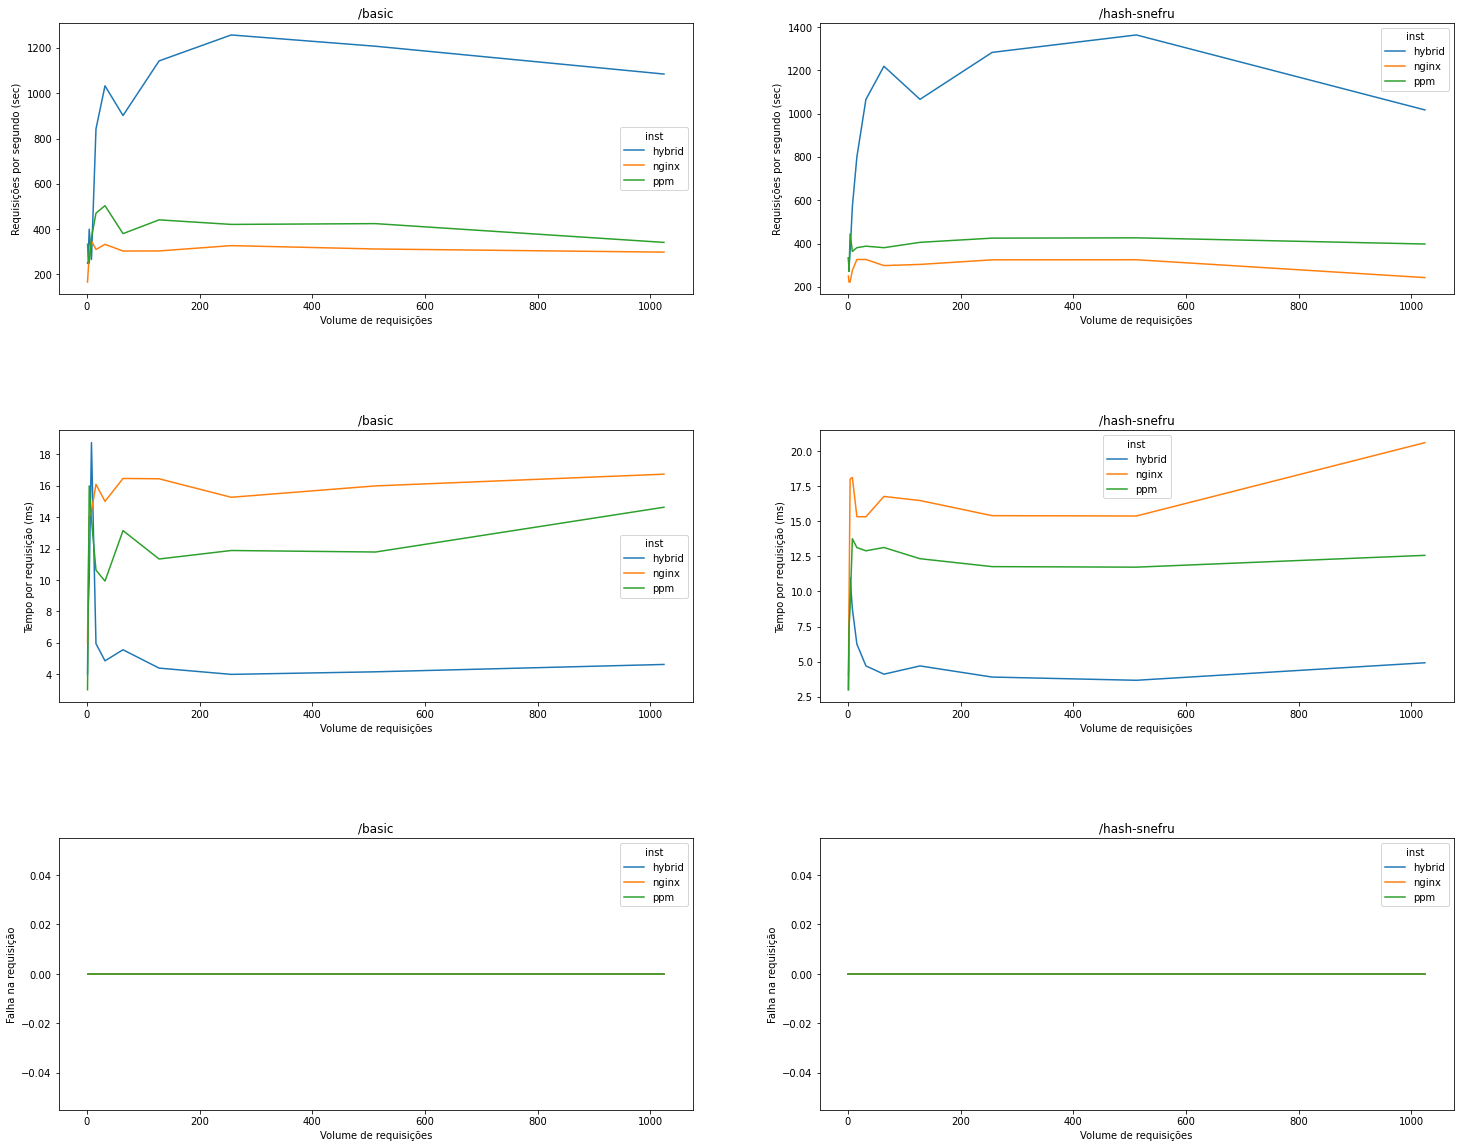

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
fig.subplots_adjust(hspace = .5)

column = 0
for key, grp in scale_benchmark_clear.groupby(['Document Path']):
    rps_pivot = grp.pivot(index='scale', columns=['inst'], values='Requests per second')
    rps_pivot.plot(kind='line', ax=axes[0, column], title=f'{key}', ylabel='Requisições por segundo (sec)', xlabel='Volume de requisições')

    tpr_pivot = grp.pivot(index='scale', columns=['inst'], values='Time per request')
    tpr_pivot.plot(kind='line', ax=axes[1, column], title=f'{key}', ylabel='Tempo por requisição (ms)', xlabel='Volume de requisições')

    fr_pivot = grp.pivot(index='scale', columns=['inst'], values='Failed requests')
    fr_pivot.plot(kind='line', ax=axes[2, column], title=f'{key}', ylabel='Falha na requisição', xlabel='Volume de requisições')
    column = column + 1 

# Grafico extresse de carga + concorrência

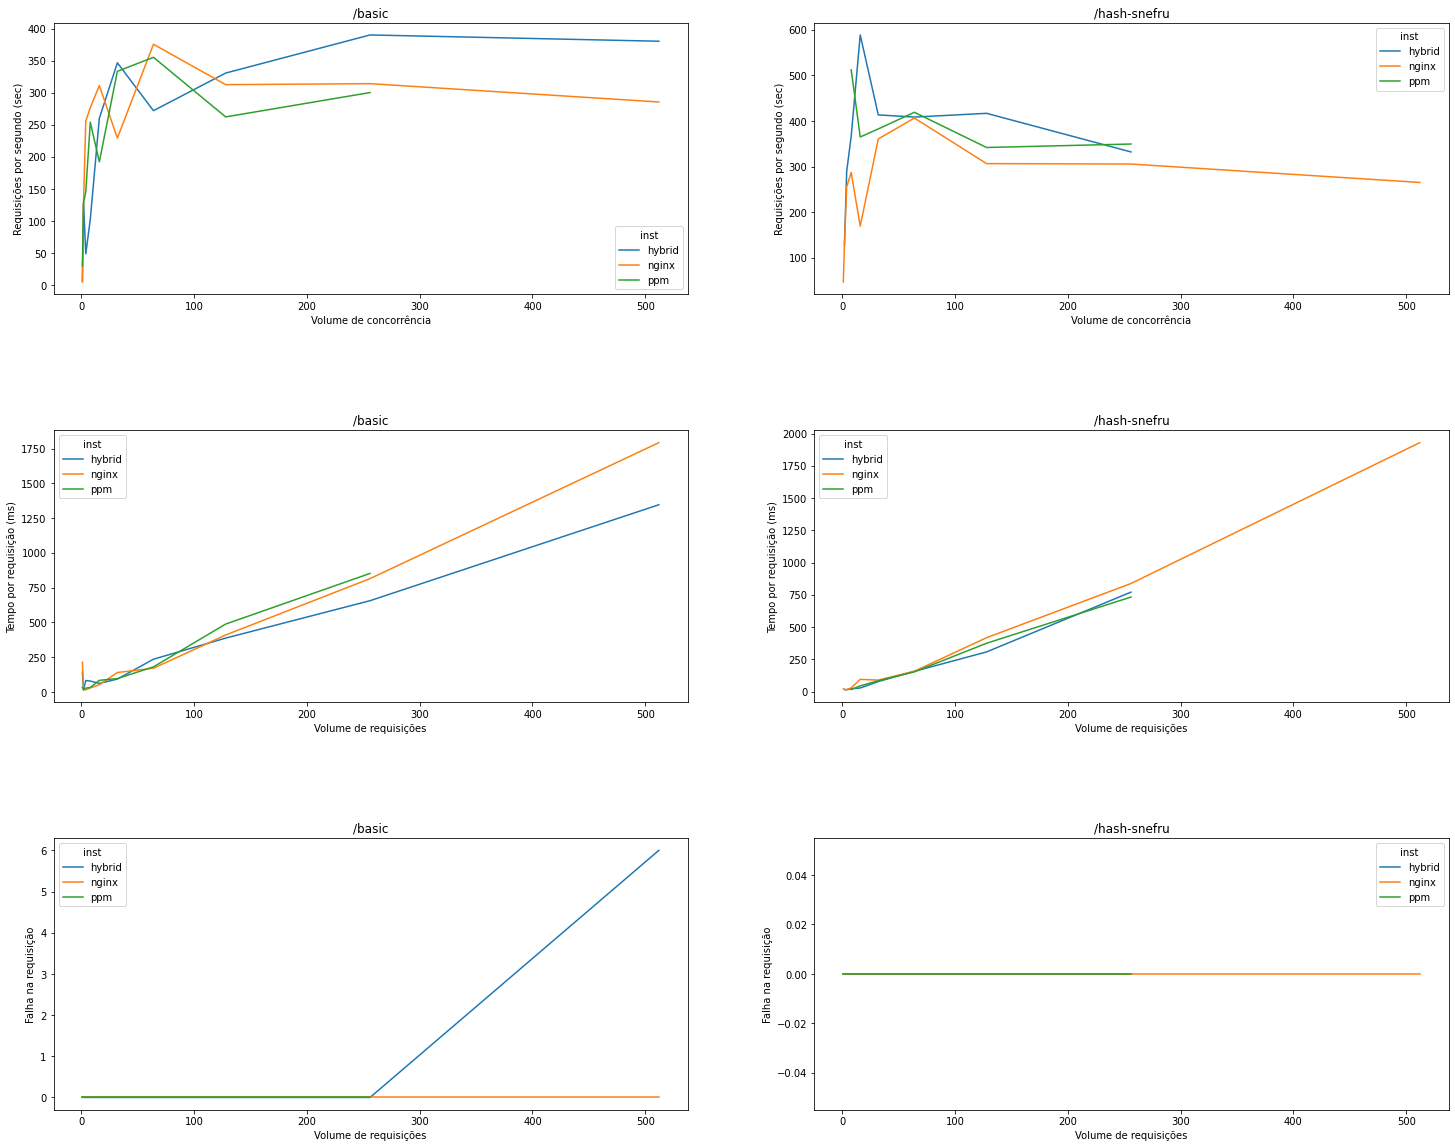

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
fig.subplots_adjust(hspace = .5)

column = 0
for key, grp in concurrency_benchmark_clear.groupby(['Document Path']):
    rps_pivot = grp.pivot(index='concurrency', columns=['inst'], values='Requests per second')
    rps_pivot.plot(kind='line', ax=axes[0, column], title=f'{key}', ylabel='Requisições por segundo (sec)', xlabel='Volume de concorrência')

    tpr_pivot = grp.pivot(index='concurrency', columns=['inst'], values='Time per request')
    tpr_pivot.plot(kind='line', ax=axes[1, column], title=f'{key}', ylabel='Tempo por requisição (ms)', xlabel='Volume de requisições')
    
    fr_pivot = grp.pivot(index='concurrency', columns=['inst'], values='Failed requests')
    fr_pivot.plot(kind='line', ax=axes[2, column], title=f'{key}', ylabel='Falha na requisição', xlabel='Volume de requisições')
    column = column + 1 

In [ ]:

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
# fig.subplots_adjust(hspace = 1)

# row = 0
# for key, grp in clear_bmkr_df.groupby(['workload']):
#     rps_pivot = grp.pivot(index='Document Path', columns=['inst'], values='Requests per second')
#     rps_pivot.plot(kind='bar', ax=axes[row, 0], title=f'Requisições por segundo: Workload {key}/10', xlabel='Endpoint')

#     dfl_pivot = grp.pivot(index='Document Path', columns=['inst'], values='Time per request')
#     dfl_pivot.plot(kind='bar', ax=axes[row, 1], title=f'Tempo por requisição: Workload {key}/10', xlabel='Endpoint')
    # row = row+1


In [ ]:
# for key, grp in clear_bmkr_df.groupby(['workload']):
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

#     rps_pivot = grp.pivot(index='Document Path', columns=['inst'], values='Requests per second')
#     rps_pivot.plot(kind='bar', ax=axes[0], title=f'Requisições por segundo: Workload {key}/10', xlabel='Endpoint')

#     dfl_pivot = grp.pivot(index='Document Path', columns=['inst'], values='Time per request')
#     dfl_pivot.plot(kind='bar', ax=axes[1], title=f'Tempo por requisição: Workload {key}/10', xlabel='Endpoint')
